#1. Docstrings
## Docstring formats
* Google Style
* Numpydocre
* StructuredText
* EpyText

## Google style

In [2]:
def function(arg_1, arg_2=42):
    """Description of what the function does.

    Args:
        arg_1 (str): Description of arg_1 that can break onto the next line
              if needed.
        arg_2 (int, optional): Write optional when an argument has a default
              value.

    Returns:
        bool: Optional description of the return value
        Extra lines are not indented.

    Raises:
        ValueError: Include any error types that the function intentionally
          raises.

    Notes:
        See https://www.datacamp.com/community/tutorials/docstrings-python
        for more info.
    """


## Numpydoc

In [1]:
def function(arg_1, arg_2=42):
    """
    Description of what the function does.

    Parameters
    ----------
    arg_1 : expected type of arg_1
        Description of arg_1.
    arg_2 : int, optional
        Write optional when an argument has a default value.
        Default=42.

    Returns
    -------
    The type of the return value
        Can include a description of the return value.
        Replace "Returns" with "Yields" if this function is a generator.
    """

## Retrieving docstrings

In [3]:
def the_answer():
    """Return the answer to life,
    the universe, and everything.

    Returns:
        int
        """
    return 42

print(the_answer.__doc__)

Return the answer to life,   
    the universe, and everything.  
    
    Returns:    
        int  
        


In [4]:
import inspect
print(inspect.getdoc(the_answer))

Return the answer to life,   
the universe, and everything.  

Returns:    
    int  
    


#2. DRY and "Do One Thing"

## Don't repeat yourself (DRY)
* Example :

In [ ]:
train = pd.read_csv('train.csv')
train_y = train['labels'].values  ### <- there and there --v ###
train_X = train[col for col in train.columns if col != 'labels'].values
train_pca = PCA(n_components=2).fit_transform(train_X) ### yikes! ###
plt.scatter(train_pca[:,0], train_pca[:,1])

In [ ]:
val = pd.read_csv('validation.csv')
val_y = val['labels'].values  ### <- there and there --v ###
val_X = val[col for col in val.columns if col != 'labels'].values
val_pca = PCA(n_components=2).fit_transform(val_X)
plt.scatter(val_pca[:,0], val_pca[:,1])

In [ ]:
test = pd.read_csv('test.csv')
test_y = test['labels'].values  ### <- there and there --v ###
test_X = test[col for col in test.columns if col != 'labels'].values
test_pca = PCA(n_components=2).fit_transform(test_X)
plt.scatter(test_pca[:,0], test_pca[:,1])

## Use functions to avoid repetition
* Example :

In [ ]:
def load_and_plot(path):
    """
    Load a dataset and plot the first two principal components.
      Args:
          path (str): The location of a CSV file.

     Returns:
         tuple of ndarray: (features, labels)
    """
    data = pd.read_csv(path)
    y = data['label'].values
    X = data[col for col in data.columns if col != 'label'].values
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1])
    return X, y

In [ ]:
train_X, train_y = load_and_plot('train.csv')
val_X, val_y = load_and_plot('validation.csv')
test_X, test_y = load_and_plot('test.csv')

## Do One Thing
* Example :

In [ ]:
def load_data(path):
    """
    Load a dataset.

      Args:
        path (str): The location of a CSV file.

    Returns:
        tuple of ndarray: (features, labels)

    """
    data = pd.read_csv(path)
    y = data['labels'].values
    X = data[col for col in data.columns if col != 'labels'].values
    return X, y


In [ ]:
def plot_data(X):
    """
    Plot the first two principal components of a matrix.
      Args:
        X (numpy.ndarray): The data to plot.
        """
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1])

## Advantages of doing one thing
The code becomes:
* More flexible
* More easily understood
* Simpler to test
* Simpler to debug
* Easier to change

## Code smells and refactoring
"Any fool can write code that a computer can understand. Good programmers write codethat humans can understand." - Martin Fowler (1999)



# 3. Pass by assignment
## Digging deeper
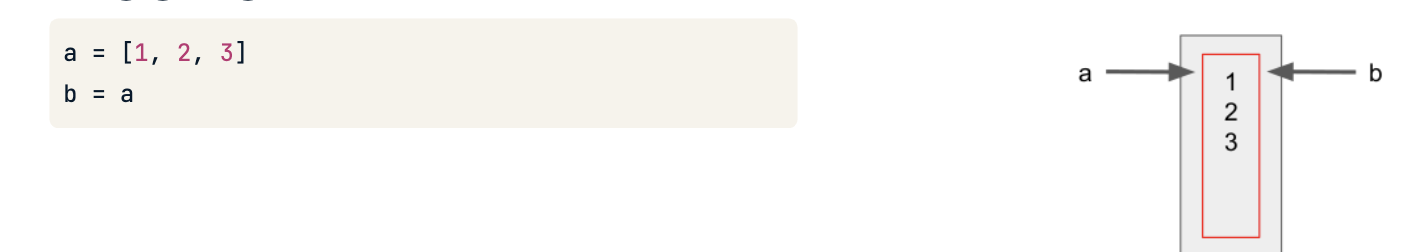


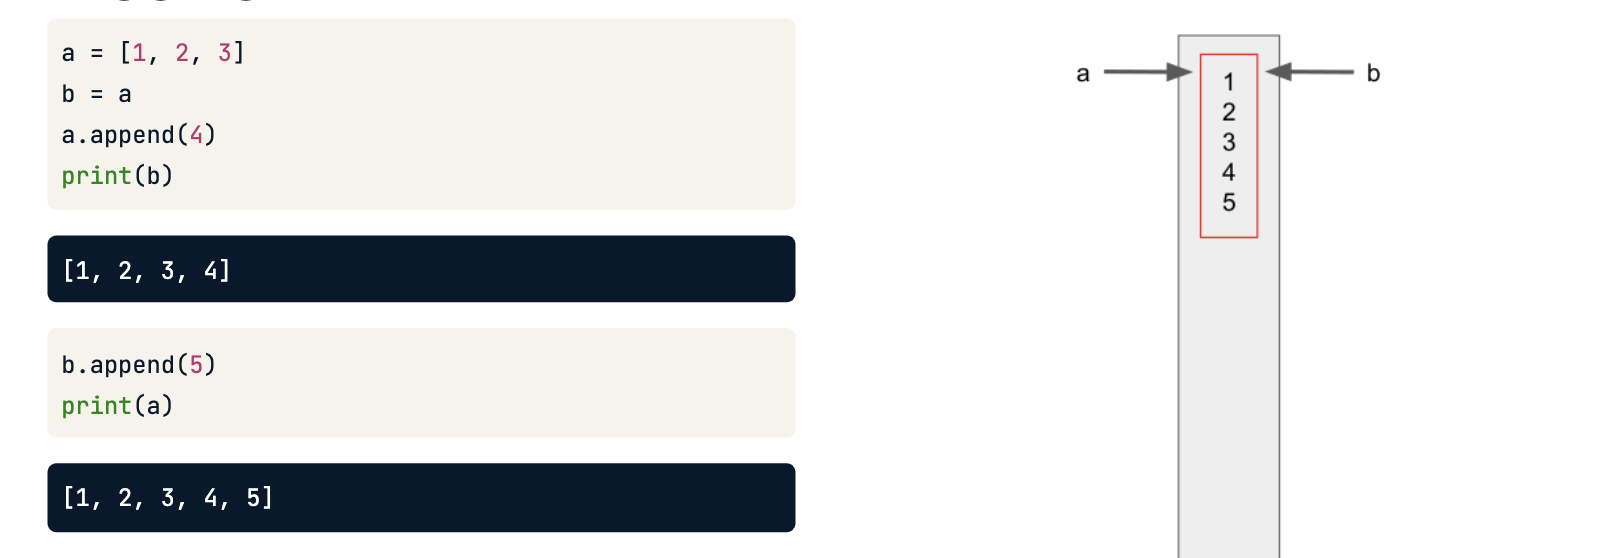

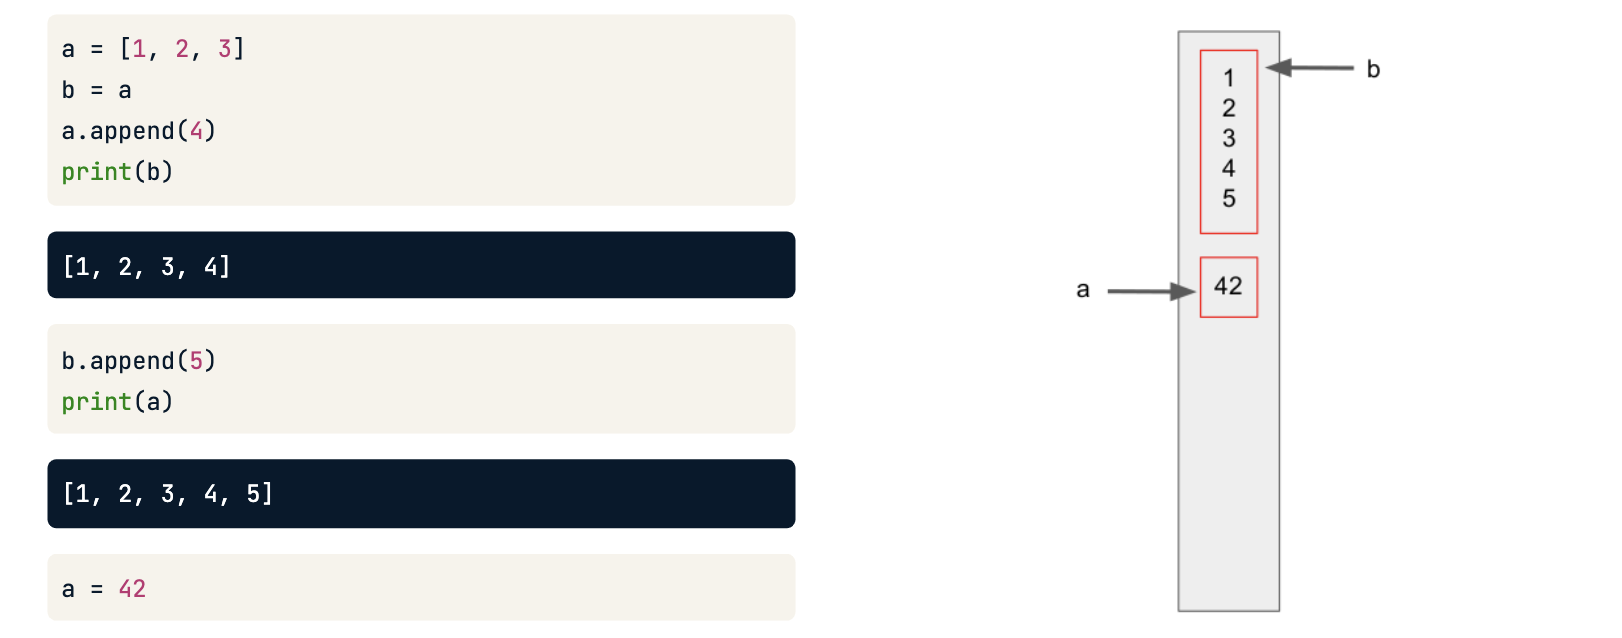

In [5]:
def foo(x):
    x[0] = 99

my_list = [1, 2, 3]
foo(my_list)
print(my_list)

[99, 2, 3]


In [6]:
def bar(x):
  x = x + 90

my_var = 3
bar(my_var)
my_var

3

## Immutable or Mutable ?
### Immutable
* int
* float
* bool
* string
* bytes
* tuple
* frozenset
* None

### Mutable
* list
* dict
* set
* bytearray
* objects
* functions
* almost everything else!


## Mutable default arguments are dangerous!

In [7]:
def foo(var=[]):
  var.append(1)
  return var
foo()

[1]

In [8]:
foo()

[1, 1]

In [9]:
def foo(var=None):
    if var is None:
        var = []
    var.append(1)
    return var
foo()

[1]

In [10]:
foo()

[1]

# 4. Using context managers
## What is a context manager?
A context manager:
* Sets up a context
* Runs your code
* Removes the context


In [ ]:
with <context-manager>(<args>) as <variable-name>:
    # Run your code here
    # This code is running "inside the context"

# This code runs after the context is removed

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)

print('The file is {} characters long'.format(length))

`open()` does three things:
* Sets up a context by opening a file
* Lets you run any code you want on that file
* Removes the context by closing the file


## Writing context managers

### Two ways to define a context manager
* Class-based
*  **Function-based ***

In [ ]:
def my_context():
    # Add any set up code you need
    yield
    # Add any teardown code you need

1. Define a function.
2. (optional) Add any set up code your context needs.
3. Use the "yield" keyword.
4. (optional) Add any teardown code your context needs.

In [ ]:
@contextlib.contextmanager
def my_context():
    # Add any set up code you need
    yield
    # Add any teardown code you need

1. Define a function.
2. (optional) Add any set up code your context needs.
3. Use the "yield" keyword.
4. (optional) Add any teardown code your context needs.
5. Add the `@contextlib.contextmanager` decorator.

## The "yield" keyword

In [13]:
import contextlib

@contextlib.contextmanager
def my_context():
    print('hello')
    yield 42
    print('goodbye')

In [14]:
with my_context() as foo:
    print('foo is {}'.format(foo))

hello
foo is 42
goodbye


## Setup and teardown

In [ ]:
@contextlib.contextmanager
def database(url):
    # set up database connection
    db = postgres.connect(url)

    yield db
    # tear down database connection
    db.disconnect()

In [ ]:
url = 'http://datacamp.com/data'
with database(url) as my_db:
    course_list = my_db.execute('SELECT * FROM courses'  )

## Yielding a value or None

In [ ]:
@contextlib.contextmanager
def in_dir(path):
    # save current working directory
    old_dir = os.getcwd()

    # switch to new working directory
    os.chdir(path)

    yield

    # change back to previous
    # working directory

    os.chdir(old_dir)

In [ ]:
with in_dir('/data/project_1/'):
    project_files = os.listdir()

#5. Nested contexts

In [ ]:
def copy(src, dst):
    """Copy the contents of one file to another.

    Args:
        src (str): File name of the file to be copied.
        dst (str): Where to write the new file.
    """
    # Open both files
    with open(src) as f_src:
        with open(dst, 'w') as f_dst:
            # Read and write each line, one at a time
            for line in f_src:
                f_dst.write(line)

## Handling errors



```
try:
    # code that might raise an error
except:
    # do something about the error
finally:
    # this code runs no matter what
```



In [ ]:
def get_printer(ip):
    p = connect_to_printer(ip)

    try:
        yield
    finally:
        p.disconnect()
        print('disconnected from printer')

doc = {'text': 'This is my text.'}
with get_printer('10.0.34.111') as printer:
    printer.print_page(doc['txt'])

## Context manager patterns
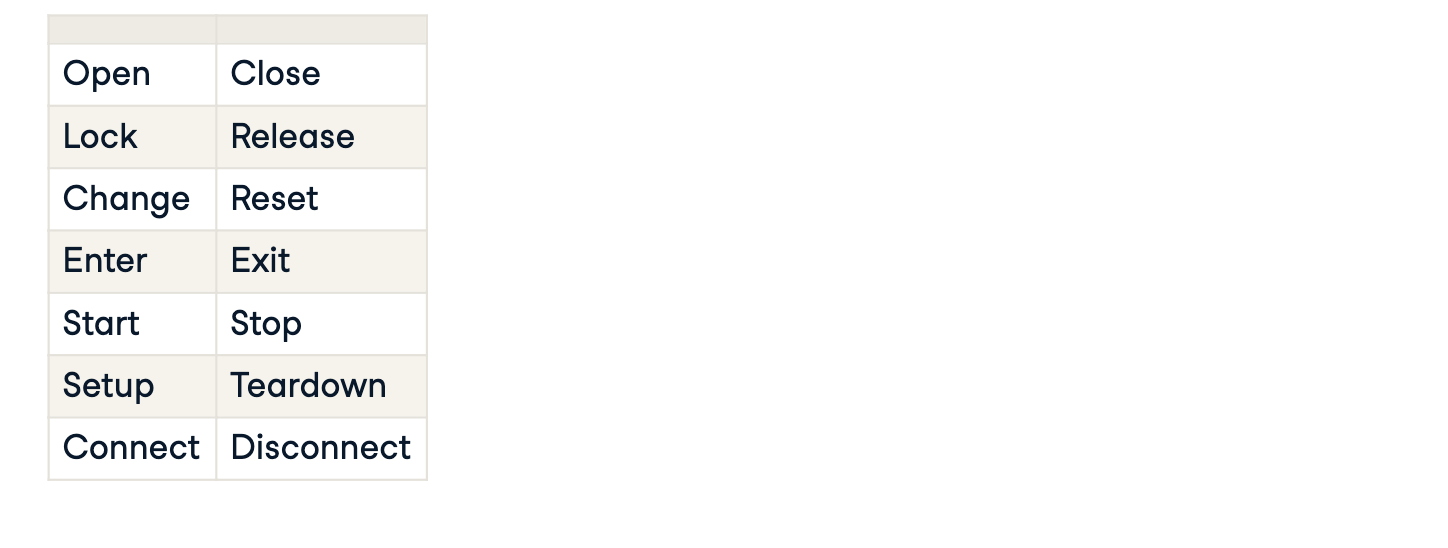

#6. Functions as objects
### Python objects:


```
def x():
    pass
x = [1, 2, 3]
x = {'foo': 42}
x = pandas.DataFrame()
x = 'This is a sentence.'
x = 3
x = 71.2
import x

```
## Functions as variables


In [1]:
def my_function():
    print('Hello')

x = my_function
type(x)

function

In [2]:
x()

Hello


In [3]:
PrintyMcPrintface = print
PrintyMcPrintface('Python is awesome!')

Python is awesome!


## Lists and dictionaries of functions

In [4]:
list_of_functions = [my_function, open, print]
list_of_functions[2]('I am printing with an element of a list!')

I am printing with an element of a list!


In [5]:
dict_of_functions = {
    'func1': my_function,
    'func2': open,
    'func3':print
    }

dict_of_functions['func3']('I am printing with a value of a dict!')

I am printing with a value of a dict!


## Referencing a function

In [6]:
def my_function():
    return 42

x = my_function
my_function()

42

In [7]:
my_function

<function __main__.my_function()>

## Functions as arguments

In [8]:
def has_docstring(func):
    """Check to see if the function
   `func` has a docstring.

  Args:
      func (callable): A function.

  Returns:
    bool

    """

    return func.__doc__ is not None

In [9]:
def no():
    return 42

def yes():
    """Return the value 42  """
    return 42

In [10]:
has_docstring(no)

False

In [11]:
has_docstring(yes)

True

## Defining a function inside another function

In [12]:
def foo():
    x = [3, 6, 9]

    def bar(y):
        print(y)

    for value in x:
        bar(x)

In [13]:
def foo(x, y):
    if x > 4 and x < 10 and y > 4 and y < 10:
        print(x * y)

In [14]:
def foo(x, y):
    def in_range(v):
        return v > 4 and v < 10

    if in_range(x) and in_range(y):
        print(x * y)

## Functions as return values

In [15]:
def get_function():
    def print_me(s):
        print(s)

    return print_me

In [16]:
new_func = get_function()
new_func('This is a sentence.')

This is a sentence.


#7. Scope

In [17]:
x = 7
y = 200
print(x)

7


In [19]:
def foo():
    x = 42
    print(x)
    print(y)
foo()

42
200


In [20]:
print(x)

7


## Scope
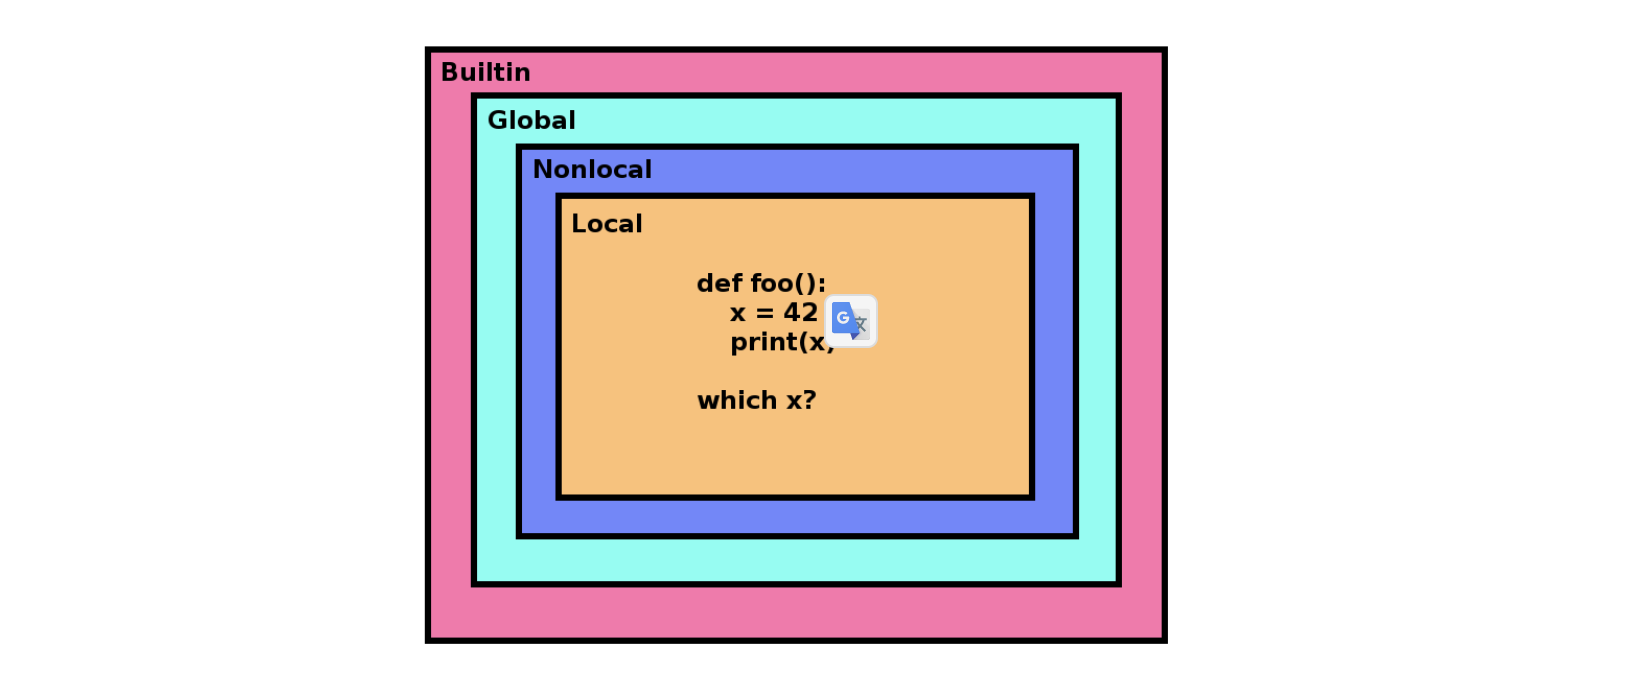


## The global keyword

In [21]:
x = 7
def foo():
    x = 42
    print(x)
foo()

42


In [22]:
print(x)

7


In [23]:
x = 7
def foo():
    global x
    x = 42
    print(x)
foo()

42


In [24]:
print(x)

42


## The nonlocal keyword

In [25]:
def foo():
    x = 10
    def bar():
        x = 200
        print(x)
    bar()
    print(x)

foo()

200
10


In [26]:
def foo():
    x = 10
    def bar():
        nonlocal x
        x = 200
        print(x)
    bar()
    print(x)

foo()

200
200


#8. Closures
## Attaching nonlocal variables to nested functions

In [29]:
def foo():
    a = 5
    def bar():
        print(a)
    return bar

func = foo()
func()

5


* Closures!

In [30]:
type(func.__closure__)

tuple

In [31]:
len(func.__closure__)

1

In [32]:
func.__closure__[0].cell_contents

5

## Closures and deletion

In [33]:
x = 25
def foo(value):
    def bar():
        print(value)
    return bar

my_func = foo(x)
my_func()

25


In [34]:
del(x)
my_func()

25


In [35]:
len(my_func.__closure__)

1

In [36]:
my_func.__closure__[0].cell_contents

25

## Closures and overwriting

In [37]:
x = 25
def foo(value):
    def bar():
        print(value)
    return bar

x = foo(x)
x()

25


In [38]:
len(x.__closure__)

1

In [39]:
x.__closure__[0].cell_contents

25

## Definitions - nested function
###**Nested function:** A function defined inside another function.

In [40]:
# outer function
def parent():
    # nested function
    def child():
        pass
    return child

## Definitions - nonlocal variables
### **Nonlocal variables:** Variables defined in the parent function that are used by the childfunction.


In [ ]:
def parent(arg_1, arg_2):
    # From child()'s point of view,
    # `value` and `my_dict` are nonlocal variables,
    # as are `arg_1` and `arg_2`.
    value = 22
    my_dict = {'chocolate': 'yummy'}

    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)

    return child

###**Closure:** Nonlocal variables attached to a returned function.

In [41]:
def parent(arg_1, arg_2):
    value = 22
    my_dict = {'chocolate': 'yummy'}

    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)
    return child

new_function = parent(3, 4)

print([cell.cell_contents for cell in new_function.__closure__])

[3, 4, {'chocolate': 'yummy'}, 22]


## Why does all of this matter?
Decorators use:
* Functions as objects
* Nested functions
* Nonlocal scope
* Closures

# 8. Decorators

```
@double_args
def multiply(a, b):
    return a * b
    
multiply(1, 5)
```

## The double_args decorator

In [45]:
def multiply(a, b):
    return a * b

def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

multiply = double_args(multiply)
multiply(1, 5)

20

In [47]:
multiply.__closure__[0].cell_contents

<function __main__.multiply(a, b)>

## Decorator syntax

In [48]:
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

def multiply(a, b):
    return a * b

multiply = double_args(multiply)
multiply(1, 5)

20

In [49]:
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

@double_args
def multiply(a, b):
    return a * b

multiply(1, 5)

20

#9. Real-world examples
## Time a function

In [51]:
import time

def timer(func):
    """A decorator that prints how long a function took to run."""
    # Define the wrapper function to return.
    def wrapper(*args, **kwargs):
        # When wrapper() is called, get the current time.
        t_start = time.time()
        # Call the decorated function and store the result.
        result = func(*args, **kwargs)
        # Get the total time it took to run, and print it.
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        return result
    return wrapper

## Using timer()

In [52]:
@timer
def sleep_n_seconds(n):
    time.sleep(n)

In [53]:
sleep_n_seconds(5)

sleep_n_seconds took 5.006080389022827s


In [54]:
sleep_n_seconds(10)

sleep_n_seconds took 10.010111093521118s


## When to use decorators
* Add common behavior to multiple functions


```
@timer
def foo():
    # do some computation
    
@timer
def bar():
    # do some other computation
    
@timer
def baz():
    # do something else
```
## Decorators and metadata


In [65]:
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.

    Args:
        n (int): The number of seconds to pause for.  """

    time.sleep(n)

print(sleep_n_seconds.__doc__)

Pause processing for n seconds.
    
    Args:
        n (int): The number of seconds to pause for.  


In [66]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [67]:
print(sleep_n_seconds.__defaults__)

(10,)


In [68]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.

    Args:
        n (int): The number of seconds to pause for.  """

    time.sleep(n)

print(sleep_n_seconds.__doc__)

None


In [69]:
print(sleep_n_seconds.__name__)

wrapper


In [70]:
from functools import wraps
def timer(func):
    """A decorator that prints how long a function took to run."""

    @wraps(func)
    def wrapper(*args, **kwargs):
        t_start = time.time()
        result = func(*args, **kwargs)
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))

        return result
    return wrapper

In [75]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.
      Args:
          n (int): The number of seconds to pause for.  """

    time.sleep(n)

print(sleep_n_seconds.__doc__)

Pause processing for n seconds.
      Args:
          n (int): The number of seconds to pause for.  


In [76]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [78]:
sleep_n_seconds.__wrapped__

<function __main__.sleep_n_seconds(n=10)>

#10. Decorators that take arguments

In [79]:
def run_three_times(func):
    def wrapper(*args, **kwargs):
        for i in range(3):
            func(*args, **kwargs)
    return wrapper

@run_three_times
def print_sum(a, b):
    print(a + b)
print_sum(3, 5)

8
8
8


In [81]:
def run_n_times(n):
    """Define and return a decorator"""
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

run_three_times = run_n_times(3)
@run_three_times
def print_sum(a, b):
    print(a + b)

@run_n_times(3)
def print_sum(a, b):
    print(a + b)